# isaura beersheba track comparison

#### low pressure data

In [107]:
import sys,os,os.path
sys.path.append("../")
sys.path.append(os.path.expanduser('~/code/eol_hsrl_python'))
os.environ['ICTDIR']='/home/e78368jw/Documents/NEXT_CODE/IC'

#%load_ext autoreload
#%autoreload 2
#%matplotlib notebook

import matplotlib.pyplot as plt
from matplotlib import rcParams
rcParams['mathtext.fontset'] = 'stix'
rcParams['font.family'] = 'STIXGeneral'
rcParams['figure.figsize'] = [10, 8]
rcParams['font.size'] = 22

import pandas as pd
import numpy  as np
import tables as tb

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.colors as clrs

import IC.invisible_cities.core.core_functions                   as     coref
import IC.invisible_cities.io.dst_io                           as     dstio

from IC.invisible_cities.cities                 import beersheba as beerfun


from IC.invisible_cities.database.load_db       import DataSiPM

from IC.invisible_cities.evm.event_model        import Cluster, Hit
from IC.invisible_cities.types.ic_types         import xy
from IC.invisible_cities.reco.paolina_functions import voxelize_hits

from IC.invisible_cities.evm.event_model        import HitEnergy
from IC.invisible_cities.cities.beersheba          import DeconvolutionMode
from IC.invisible_cities.cities.beersheba          import CutType


from IC.invisible_cities.reco.deconv_functions import deconvolve
from IC.invisible_cities.reco.deconv_functions import deconvolution_input
from IC.invisible_cities.reco.deconv_functions import InterpolationMethod

import IC.invisible_cities.io.mcinfo_io as mcio


import matplotlib.cm as cm
from matplotlib.colors import Normalize

In [108]:
# choose an event :) but make sure it exists! do it via index
evt_number = 1820174

In [109]:
### COLLECT BEERSHEBA PLOTS
LP_file = f'LPR/208Tl/PORT_1a/prod/beersheba/beersheba_92_208Tl.h5'
HP_file = f'HPR/208Tl/PORT_1a/prod/beersheba/beersheba_92_208Tl.h5'

# load in events from deco
hdst = dstio.load_dst(LP_file, 'DECO', 'Events')
print(hdst.event.nunique())
print(hdst.event.unique()[:10])

355
[1820000 1820002 1820004 1820006 1820008 1820010 1820012 1820014 1820016
 1820018]


In [110]:
# add isaura equivalent
LP_file_isaura = f'LPR/208Tl/PORT_1a/prod/isaura/isaura/isaura_92_208Tl.h5'

hdst_isaura = dstio.load_dst(LP_file_isaura, 'Tracking', 'Tracks')

In [111]:
display(hdst_isaura)

,event,trackID,energy,length,numb_of_voxels,numb_of_hits,numb_of_tracks,x_min,y_min,z_min,...,blob1_z,blob2_x,blob2_y,blob2_z,eblob1,eblob2,ovlp_blob_energy,vox_size_x,vox_size_y,vox_size_z
0,1820000,0,0.807659,54.646156,72,4102,2,275.675,299.675,439.417358,...,457.736060,329.395104,308.398351,471.548628,0.131820,0.059064,0.000000,9.625000,8.5,4.940265
1,1820000,1,0.172963,27.517038,17,675,2,326.675,294.675,497.167542,...,500.830664,349.762398,319.497675,509.764679,0.139512,0.060510,0.027059,9.625000,8.5,4.940265
2,1820002,0,1.124794,111.709353,112,5969,1,-347.325,260.675,299.781647,...,351.442621,-342.763389,329.907150,335.132813,0.617010,0.150553,0.000000,10.000000,9.0,4.862141
3,1820004,0,0.462868,24.914975,18,1119,3,308.675,342.675,530.796326,...,533.879279,311.813824,349.495357,544.556117,0.438725,0.346638,0.322495,9.857143,8.4,4.975021
4,1820004,1,0.147351,25.901603,11,553,3,288.675,361.675,655.727478,...,662.001221,311.743401,365.625149,660.951233,0.136943,0.124569,0.114161,9.857143,8.4,4.975021
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1148,1820716,6,0.003373,0.000000,1,21,11,21.675,472.675,763.849182,...,763.849182,23.682228,474.635973,763.849182,0.003373,0.003373,0.003373,9.944444,9.5,4.985182
1149,1820716,7,0.003163,0.000000,1,22,11,21.675,456.675,764.923767,...,764.923767,23.735259,458.877284,764.923767,0.003163,0.003163,0.003163,9.944444,9.5,4.985182
1150,1820716,8,0.003036,9.944444,2,21,11,52.675,472.675,752.337463,...,752.337463,56.675000,474.657016,752.337463,0.003036,0.003036,0.003036,9.944444,9.5,4.985182
1151,1820716,9,0.002271,9.944444,2,19,11,84.675,409.675,712.392273,...,712.392273,87.422742,411.251029,712.392273,0.002271,0.002271,0.002271,9.944444,9.5,4.985182


In [112]:
display(hdst)

,event,npeak,X,Y,Z,E
0,1820000,0.0,300.675,309.675,439.417358,0.000071
1,1820000,0.0,300.675,310.675,439.417358,0.000083
2,1820000,0.0,300.675,311.675,439.417358,0.000075
3,1820000,0.0,300.675,312.675,439.417358,0.000052
4,1820000,0.0,301.675,307.675,439.417358,0.000061
...,...,...,...,...,...,...
1690485,1820716,0.0,9.675,473.675,815.265747,0.000151
1690486,1820716,0.0,9.675,474.675,815.265747,0.000176
1690487,1820716,0.0,9.675,475.675,815.265747,0.000150
1690488,1820716,0.0,9.675,476.675,815.265747,0.000093


In [113]:
hdst_example = hdst_isaura[hdst_isaura.event == 1820000]
#display(hdst_example)
#display(hdst_example.loc[0].numb_of_tracks)
#display(hdst_example.numb_of_tracks == 1)
#display(hdst_example.numb_of_tracks[0])
display(hdst_isaura.event.unique())

array([1820000, 1820002, 1820004, 1820006, 1820008, 1820010, 1820012,
       1820014, 1820016, 1820018, 1820020, 1820022, 1820024, 1820026,
       1820028, 1820030, 1820032, 1820034, 1820036, 1820038, 1820040,
       1820042, 1820044, 1820046, 1820048, 1820050, 1820052, 1820054,
       1820056, 1820058, 1820060, 1820062, 1820064, 1820066, 1820068,
       1820070, 1820072, 1820074, 1820076, 1820078, 1820080, 1820082,
       1820084, 1820086, 1820088, 1820090, 1820092, 1820094, 1820096,
       1820098, 1820100, 1820102, 1820104, 1820106, 1820108, 1820110,
       1820112, 1820114, 1820116, 1820118, 1820120, 1820122, 1820124,
       1820126, 1820128, 1820130, 1820132, 1820134, 1820136, 1820138,
       1820140, 1820142, 1820144, 1820146, 1820148, 1820150, 1820152,
       1820154, 1820156, 1820158, 1820160, 1820162, 1820164, 1820166,
       1820168, 1820170, 1820172, 1820174, 1820176, 1820178, 1820180,
       1820182, 1820184, 1820186, 1820188, 1820190, 1820192, 1820194,
       1820196, 1820

In [114]:
# This only takes events with a total energy larger than the minimum within our ROI
# 1.5 - 1.7 MeV
i = 0
j = 0
e_sum_list = []

for evt in hdst.event.unique():
    hits_df_evt = hdst[hdst.event == evt]
    if((hits_df_evt.E.sum() > 1.5) and (hits_df_evt.E.sum() < 1.7)):
        print(evt,hits_df_evt.E.sum() )
        e_sum_list.append(evt)
        i += 1

print("{} number of events with E between 1.5 and 1.7 MeV\n".format(i))

print("One tracks")

for evt in hdst_isaura.event.unique():
    isaura_df_evt = hdst_isaura[hdst_isaura.event == evt]
    #print(type(hdst_isaura.numb_of_tracks[0]))
    if (hdst_isaura.numb_of_tracks[0] == np.int64(1)):
        print(evt)
        j +=1
print("{} number of events with 1 track".format(j))

1820042 1.6500218172665964
1820124 1.515220577542988
1820134 1.6647470396583437
1820166 1.597366818108764
1820174 1.6926742298885615
1820250 1.6864228985695582
1820292 1.603502694911486
1820316 1.5965483846917814
1820352 1.626328737213514
1820356 1.5494415961308383
1820390 1.5820085465856826
1820504 1.6131108701277115
1820534 1.5971879736543284
1820608 1.6954954449363127
1820620 1.5785720973892607
1820646 1.5969752568570774
1820652 1.5933153652462737
1820684 1.650855868420738
1820686 1.5521188136242756
1820714 1.5551748336131896
1820716 1.6499374540987315
21 number of events with E between 1.5 and 1.7 MeV

One tracks
0 number of events with 1 track


In [115]:
# load in MC tracks

evtmap = mcio.load_eventnumbermap(LP_file).set_index('nexus_evt')
true_info = mcio.load_mchits_df(LP_file).reset_index()
true_info.event_id = true_info.event_id.map(evtmap.evt_number)

display(evtmap)
display(true_info)
display(true_info.loc[true_info['event_id'] == evt_number])

,evt_number
nexus_evt,
910000,1820000
910001,1820002
910002,1820004
910003,1820006
910004,1820008
...,...
910354,1820708
910355,1820710
910356,1820712


,event_id,particle_id,hit_id,x,y,z,time,energy,label
0,1820000,19,0,356.416962,336.049774,524.433044,0.253626,0.000071,ACTIVE
1,1820000,25,0,356.417023,336.049713,524.433105,0.253670,0.000021,ACTIVE
2,1820000,24,0,356.416962,336.049774,524.433044,0.253630,0.000047,ACTIVE
3,1820000,23,0,356.416992,336.049805,524.433044,0.253643,0.000023,ACTIVE
4,1820000,22,0,355.800537,335.284149,524.406067,0.257113,0.015677,ACTIVE
...,...,...,...,...,...,...,...,...,...
132536,1820716,31,90,148.694321,378.104828,658.901184,1.290062,0.000632,ACTIVE
132537,1820716,31,91,148.702423,378.104889,658.908630,1.290308,0.002348,ACTIVE
132538,1820716,31,92,148.702728,378.099976,658.910706,1.290462,0.000711,ACTIVE
132539,1820716,31,93,148.701996,378.096313,658.911682,1.290587,0.001944,ACTIVE


,event_id,particle_id,hit_id,x,y,z,time,energy,label
30748,1820174,46,0,-213.652908,20.819094,340.722961,4.439999,0.000267,ACTIVE
30749,1820174,63,0,-213.653015,20.819006,340.722870,4.440061,0.000021,ACTIVE
30750,1820174,62,0,-213.652863,20.819094,340.722992,4.440012,0.000047,ACTIVE
30751,1820174,61,0,-213.652893,20.819010,340.722931,4.440025,0.000033,ACTIVE
30752,1820174,60,0,-213.652939,20.819315,340.722992,4.440055,0.000046,ACTIVE
...,...,...,...,...,...,...,...,...,...
31431,1820174,156,12,-168.822830,278.819427,996.371216,2.681233,0.002389,ACTIVE
31432,1820174,156,13,-168.815414,278.823486,996.369568,2.681443,0.001491,ACTIVE
31433,1820174,156,14,-168.817139,278.825165,996.364990,2.681594,0.001218,ACTIVE
31434,1820174,156,15,-168.817032,278.826538,996.367432,2.681696,0.000883,ACTIVE


In [116]:

this_evt_true_info = true_info[true_info.event_id == evt_number]

xt = this_evt_true_info.x
yt = this_evt_true_info.y
zt = this_evt_true_info.z
et = this_evt_true_info.energy*1000

In [117]:
this_evt_df = hdst[hdst.event == evt_number]

display(this_evt_df)

x = this_evt_df.X
y = this_evt_df.Y
z = this_evt_df.Z
e = this_evt_df.E*1000

print(x)
print(x.max(), x.min())

,event,npeak,X,Y,Z,E
406412,1820174,0.0,-212.325,21.675,338.685822,0.000011
406413,1820174,0.0,-212.325,22.675,338.685822,0.000021
406414,1820174,0.0,-212.325,23.675,338.685822,0.000026
406415,1820174,0.0,-212.325,24.675,338.685822,0.000020
406416,1820174,0.0,-212.325,25.675,338.685822,0.000009
...,...,...,...,...,...,...
414745,1820174,3.0,-208.325,321.675,1029.479980,0.000093
414746,1820174,3.0,-207.325,317.675,1029.479980,0.000101
414747,1820174,3.0,-207.325,318.675,1029.479980,0.000135
414748,1820174,3.0,-207.325,319.675,1029.479980,0.000136


406412   -212.325
406413   -212.325
406414   -212.325
406415   -212.325
406416   -212.325
           ...   
414745   -208.325
414746   -207.325
414747   -207.325
414748   -207.325
414749   -207.325
Name: X, Length: 8338, dtype: float64
480.675 -228.325


In [118]:

this_evt_df = hdst[hdst.event == evt_number]

    
x = this_evt_df.X
y = this_evt_df.Y
z = this_evt_df.Z
e = this_evt_df.E*1000

#print(x)
x_range = (x.max()-x.min())/2.
y_range = (y.max()-y.min())/2.
z_range = (z.max()-z.min())/2.
mid_x   = (x.max()+x.min())/2.
mid_y   = (y.max()+y.min())/2.
mid_z   = (z.max()+z.min())/2.

xbins = int(x.max()-x.min())
ybins = int(y.max()-y.min())
zbins = int((z.max()-z.min())/2.)

print(z.max())

1029.47998046875


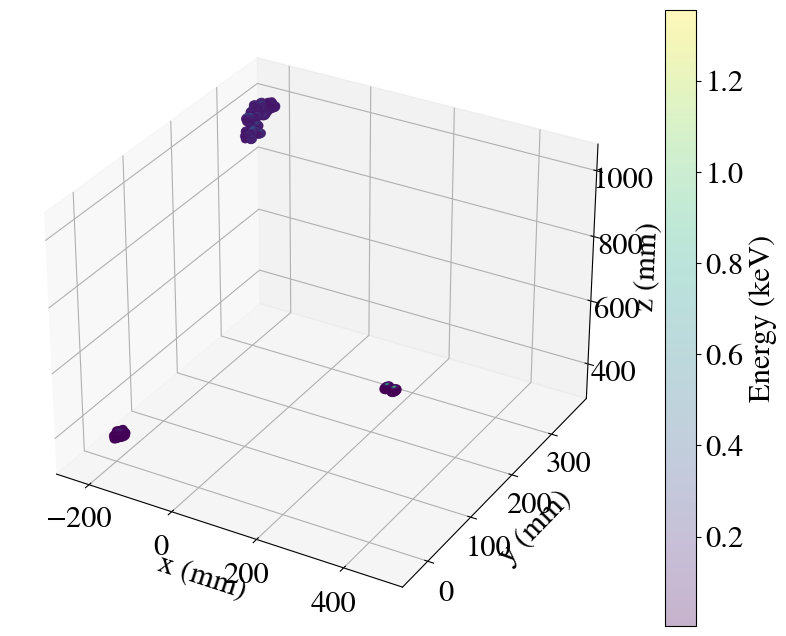

Event 1820174 
Energy: 1.6927


In [119]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

p = ax.scatter(x, y, z, c=e, alpha=0.3, cmap='viridis')
cb = fig.colorbar(p, ax=ax)
cb.set_label('Energy (keV)')

ax.set_xlabel('x (mm)')
ax.set_ylabel('y (mm)')
ax.set_zlabel('z (mm)')

plt.show()
hits_df_evt = hdst[hdst.event == evt_number]
print('Event {} \nEnergy: {:.4f}'.format(evt_number, hits_df_evt.E.sum()))

In [120]:
# extract the relevant isaura blob positions
display(hdst_isaura.loc[hdst_isaura['event'] == evt_number])
# take blob x,y,z for 1 and 2 here and plot them with circles

#blob1_x = 

,event,trackID,energy,length,numb_of_voxels,numb_of_hits,numb_of_tracks,x_min,y_min,z_min,...,blob1_z,blob2_x,blob2_y,blob2_z,eblob1,eblob2,ovlp_blob_energy,vox_size_x,vox_size_y,vox_size_z
273,1820174,0,1.355285,114.001191,104,5687,4,-223.325,265.675,971.778992,...,972.400869,-171.586344,270.754851,996.794886,0.259541,0.217016,0.000000,9.985915,9.775,4.969742
274,1820174,1,0.203997,14.831300,6,1267,4,-218.325,11.675,338.685822,...,342.266476,-207.153131,16.420642,344.823396,0.203997,0.203997,0.203997,9.985915,9.775,4.969742
275,1820174,2,0.089383,19.971831,4,428,4,453.675,-28.325,805.884888,...,806.522051,458.695090,-22.946193,808.559498,0.088832,0.088239,0.087688,9.985915,9.775,4.969742
276,1820174,3,0.044009,10.965809,3,104,4,-208.325,316.675,1017.955139,...,1021.417741,-205.734596,330.134496,1017.955139,0.044009,0.044009,0.044009,9.985915,9.775,4.969742


Text(0, 0.5, 'z (mm)')

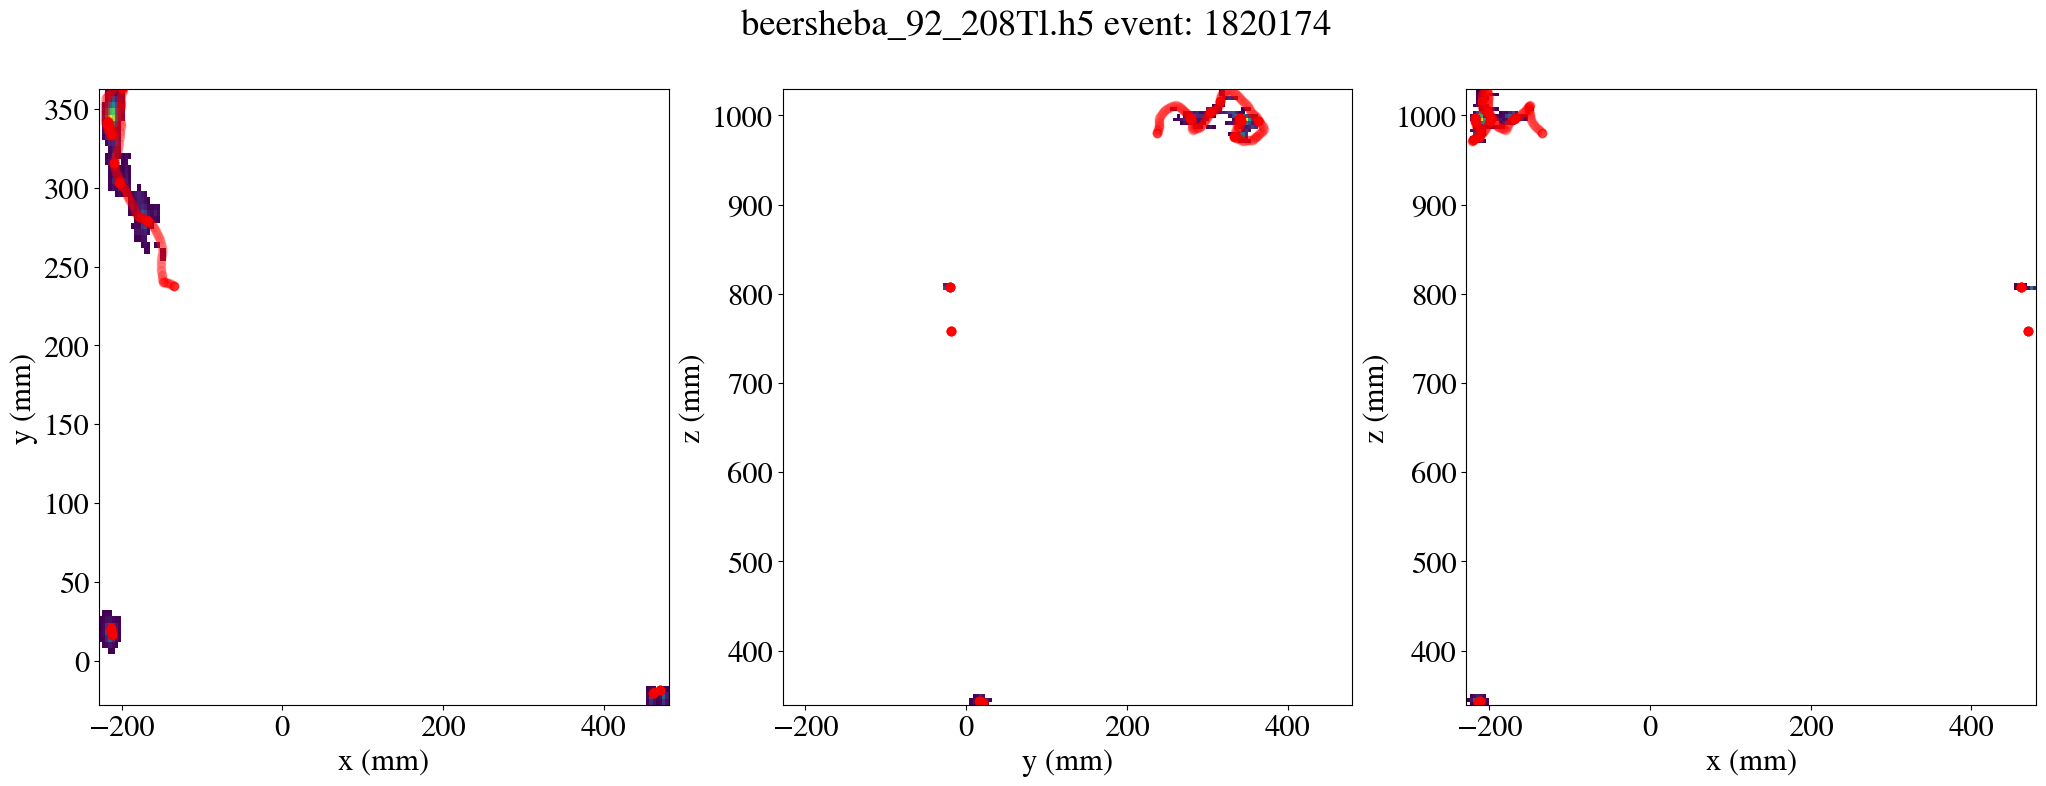

In [121]:
# plot x,y,z
plot_title = "beersheba_92_208Tl.h5 event: " + str(evt_number)
fig, ((ax1), (ax2), (ax3)) = plt.subplots(1, 3, sharex=True, figsize=(25, 8))
fig.suptitle(plot_title)


ax1.hist2d(x, y, weights=e, bins=(int(x_range/2), int(y_range/2)),
               range=((mid_x - x_range, mid_x + x_range), (mid_y - y_range, mid_y + y_range)),
               cmin=0.0001)
# MC
ax1.scatter(xt, yt, color='red', alpha = 0.1)

ax1.set_xlabel('x (mm)')
ax1.set_ylabel('y (mm)')

ax2.hist2d(y, z, weights=e, bins=(int(y_range/2), int(z_range/2)),
               range=((mid_y - y_range, mid_y + y_range), (mid_z - z_range, mid_z + z_range)),
               cmin=0.0001)

# MC
ax2.scatter(yt, zt, color='red', alpha = 0.1)

ax2.set_xlabel('y (mm)')
ax2.set_ylabel('z (mm)')

ax3.hist2d(x, z, weights=e,  bins=(int(x_range/2), int(z_range/2)),
               range=((mid_x - x_range, mid_x + x_range), (mid_z - z_range, mid_z + z_range)),
               cmin=0.0001)

# MC
ax3.scatter(xt, zt, color='red', alpha = 0.1)

ax3.set_xlabel('x (mm)')
ax3.set_ylabel('z (mm)')

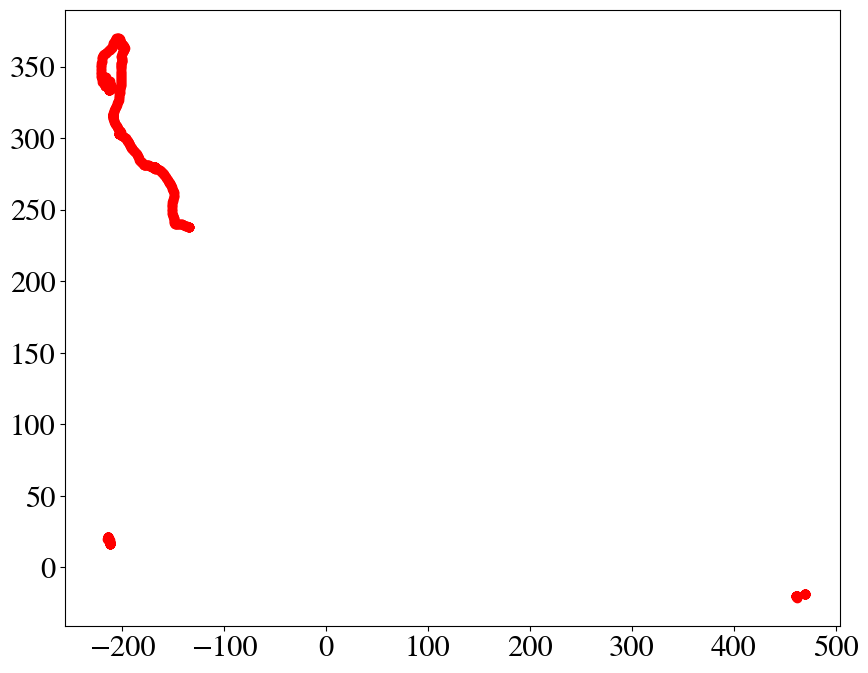

In [122]:
plt.scatter(xt,yt, color='red')